In [29]:
"""
La data visualisation, ou dataviz pour les intimes. La data visualisation est un ensemble de techniques utilisées pour communiquer
des informations clés sur un gros volume de données, afin d’en faciliter la compréhension et l'analyse.

Pour représenter :

- une évolution dans le temps, on privilégiera des diagrammes en barres ou des courbes;
- une comparaison entre différents groupes, on utilisera un diagramme circulaire ou un diagrammes en barres;
- une distribution, on privilégiera un histogramme ou un diagramme à densité;
- la relation entre 2 variables numériques, on développera un nuage de points.

Il existe quelques règles à observer pour réaliser un graphique efficace:

- privilégier la simplicité, quitte à multiplier le nombre de graphiques;
- privilégier la clarté, en proposant le plus d’informations possible pour permettre au lecteur d’interpréter seul ce graphique;
- choisir le graphique adéquat en fonction de ce qu’on cherche à représenter.

Chaque représentation graphique a une fonction correspondante avec Matplotlib:

- nuage de points ou scatter plot, en anglais :scatter();
- diagrammes en ligne ou en courbes :plot();
- diagrammes en barres :bar();
- histogrammes :hist();
- diagrammes circulaires :pie()
"""

import pandas as pd
import matplotlib.pyplot as plt

prets = pd.read_csv("data/prets.csv")
prets

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014
...,...,...,...,...,...,...,...,...
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.206
240,224,PARIS,75008,5118.0,238.20,25,automobile,3.423
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140


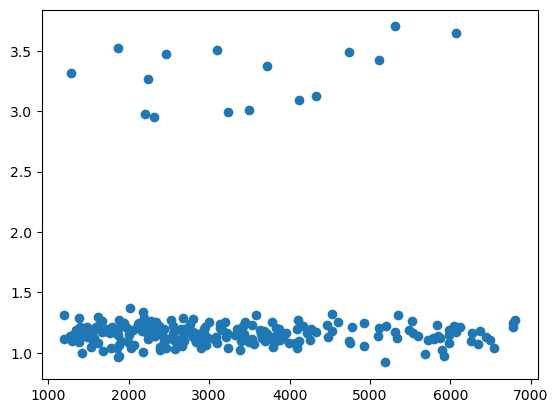

In [2]:
# représenter le taux d’endettement en fonction du revenu
revenu = prets["revenu"]
taux = prets["taux"]

plt.scatter(x=revenu, y=taux)

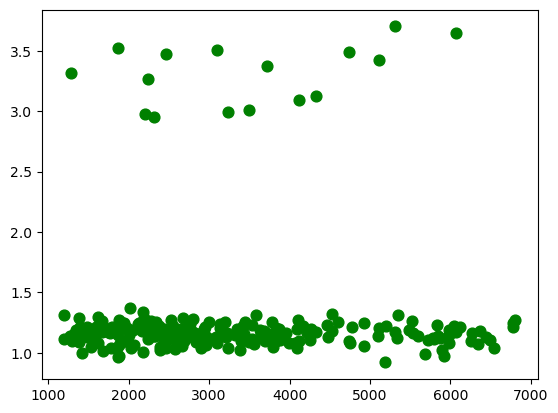

In [3]:
"""
Il existe de nombreuses options pour personnaliser un nuage de points. On peut modifier:

- la couleur des points, en utilisant l’argumentcolor ou c ;
- la taille des points, via l’argumentsize ou s;
- le type de marqueur via l’argument marke r;
- la transparence des points via l’argument alpha.
"""

plt.scatter(x=revenu, y=taux, s=60, c='green')

([<matplotlib.patches.Wedge at 0x15f099010>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BORDEAUX'),
  Text(0.7559779933342196, 0.7990602440331811, 'LYON'),
  Text(-0.22079479320563616, 1.0776129450286316, 'MARSEILLE'),
  Text(-0.9928563505107825, 0.4735359197045252, 'NICE'),
  Text(-0.35667736499371744, -1.0405677571889005, 'PARIS'),
  Text(1.0582353655336645, -0.30022976390396683, 'TOULOUSE')],
 [Text(0.58557179443924, 0.1307886598952998, '6.99%'),
  Text(0.41235163272775605, 0.43585104219991694, '11.89%'),
  Text(-0.12043352356671062, 0.5877888791065262, '18.66%'),
  Text(-0.5415580093695176, 0.2582923198388319, '10.74%'),
  Text(-0.19455128999657312, -0.5675824130121274, '42.91%'),
  Text(0.5772192902910896, -0.1637616894021637, '8.80%')])

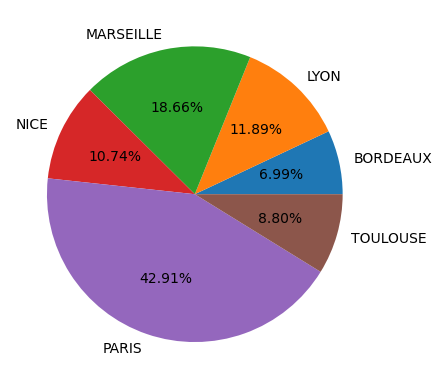

In [4]:
# afficher la part du chiffre d'affaires total réalisé par chaque agence, avec 2 chiffres après la virgule et suivie du caractère % .
data = prets.groupby("ville")["remboursement"].sum()
data = data.reset_index()

plt.pie(x=data["remboursement"], labels=data["ville"], autopct="%.2f%%")

Text(0.5, 0, 'AGENCE')

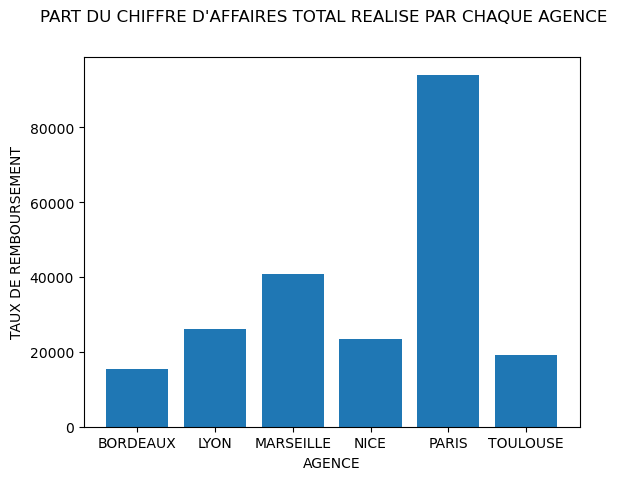

In [28]:
"""
Pour utiliser la fonction bar, qui est l’implémentation de Matplotlib des diagrammes à barres, il faut préciser deux arguments:

- x: les différentes valeurs de la variable non numérique, l’équivalent dulabels depie;
- height: les valeurs agrégées, équivalent du x de pie.
"""

plt.bar(x=data["ville"], height=data["remboursement"])

plt.suptitle("PART DU CHIFFRE D'AFFAIRES TOTAL REALISE PAR CHAQUE AGENCE")
plt.ylabel("TAUX DE REMBOURSEMENT")
plt.xlabel("AGENCE")

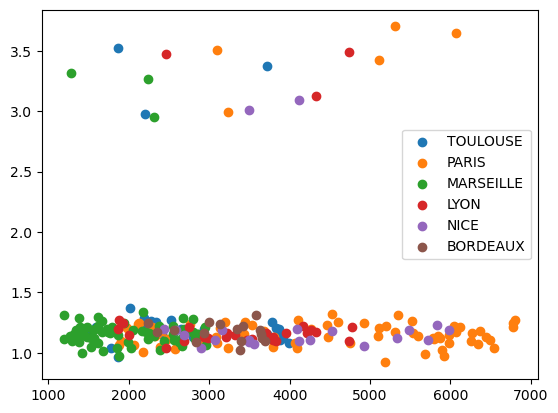

In [31]:
# Créez plusieurs graphiques sur une même fenêtre

for ville in prets["ville"].unique():
    df = prets.loc[prets["ville"] == ville, :]
    plt.scatter(df["revenu"], df["taux"], label=ville)
    plt.legend()

plt.show()

In [32]:
"""
Les graphiques à produire sont donc:

- la proportion de chaque type de prêt;
- le bénéfice mensuel réalisé en fonction du revenu du client pour les prêts immobiliers;
- la distribution des bénéfices réalisés;
- le bénéfice mensuel total réalisé par agence.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

prets = pd.read_csv("data/prets_final.csv")
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


([<matplotlib.patches.Wedge at 0x169626c90>,
 [Text(-1.0767412667284106, 0.22500720993803233, 'immobilier'),
  Text(1.0767412772617573, -0.22500715953213576, 'automobile')],
 [Text(-0.5873134182154967, 0.1227312054207449, '93.44%'),
  Text(0.5873134239609584, -0.1227311779266195, '6.56%')])

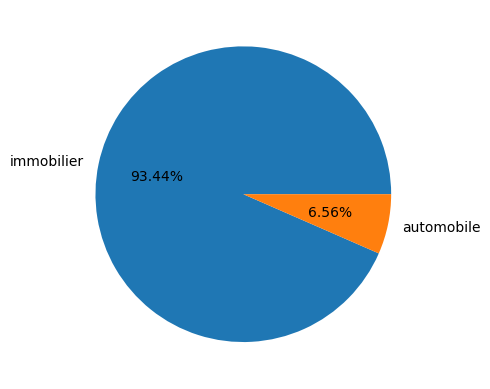

In [38]:
# la proportion de prêt par type de prêt

type_agreg = prets['type'].value_counts().reset_index()

# renommer toutes les colonnes en une fois :
type_agreg.columns = ['type', 'nombre']

# Pour la visualisation, vous pouvez opter pour un diagramme à barres ou un diagramme circulaire
# plt.bar(type_agreg['type'], type_agreg['nombre'])
plt.pie(x=type_agreg['nombre'], labels=type_agreg["type"], autopct="%.2f%%")

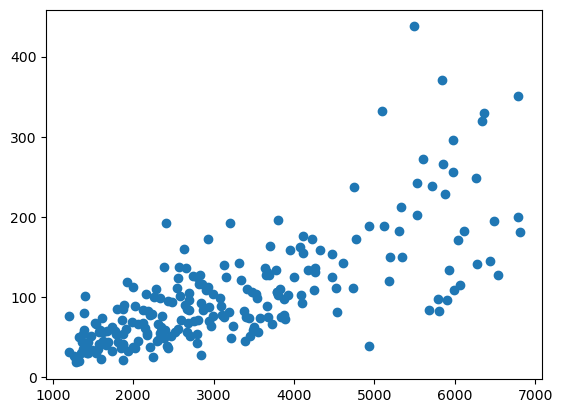

In [39]:
# bénéfice mensuel réalisé en fonction du revenu du client pour les prêts immobiliers
prets_immo = prets.loc[prets["type"] == "immobilier", :]
plt.scatter(prets_immo["revenu"], prets_immo["benefices"])

(array([63., 77., 57., 20., 12.,  7.,  2.,  4.,  1.,  1.]),
 array([  8.49 ,  51.404,  94.318, 137.232, 180.146, 223.06 , 265.974,
        308.888, 351.802, 394.716, 437.63 ]),
 <BarContainer object of 10 artists>)

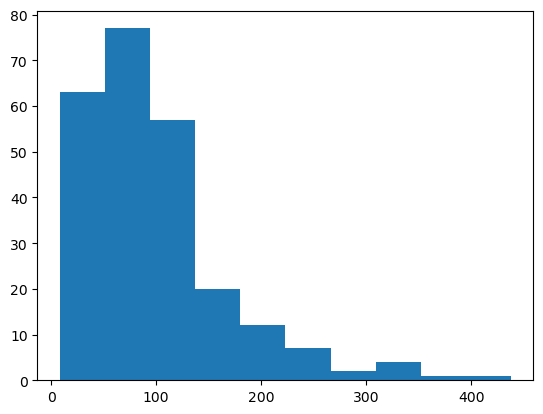

In [40]:
# la distribution des bénéfices réalisés
plt.hist(prets["benefices"])

<BarContainer object of 6 artists>

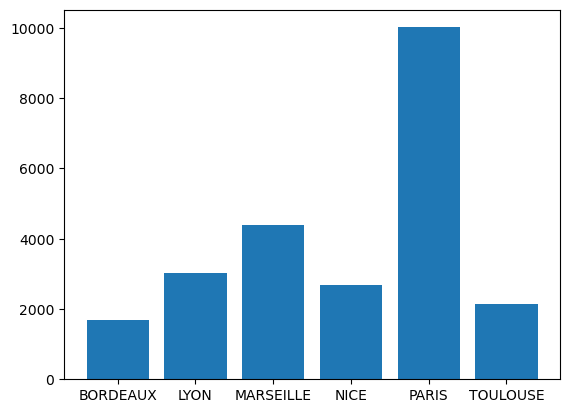

In [53]:
# le bénéfice mensuel total réalisé par agence.
benef_ville = prets.groupby("ville")["benefices"].sum().reset_index()
benef_ville

plt.bar(benef_ville['ville'], benef_ville["benefices"])